# Galaxies, mergers and groups

In this notebook we use Galaxy Zoo 2 (GZ2) data which has been matched to group data from Yang to investigate the relations between mergers and groups.

The GZ2 data can be found at https://data.galaxyzoo.org/
<br>
Information on Data Release 7 of the Sloan Digital Sky Survery (SDSS) can be found at https://classic.sdss.org/dr7/
<br>
The Yang group data can be found at https://gax.sjtu.edu.cn/data/Group.html


We are using GZ2 "Table 5" in this notebook, which has been merged with the SDSS metadata provided on the GZ2 data page in order to get redshifts and magnitudes for the 243,500 galaxies in the data set.
<br>
We use Yang Catalogue "PetroC" containing 639,359 galaxies and 473,872 groups.

The Yang data set covers redshifts $0.01 \leq z \leq 0.2$, whereas the GZ2 data has galaxies in the range $0.0005 \leq z \leq 0.25$. If we apply this cut to the GZ2 data we reduce our sample to 239,221 galaxies. We then match the GZ2 data to the Yang data by right-ascension (ra) and declination (dec) with a maximum error in position of 5 arcsec. This gives us a total of 233,756 galaxies with group data.

When the data was matched, there were 319 galaxies which had a difference in redshift of greater than 0.01 between the redshift from the GZ2 metadata and the redshift from the Yang group data. For these galaxies, we attempted to obtain updated redshifts from the latest SDSS data release (DR15). Of these 319 galaxies, 310 updated redshifts were obtained. The 9 galaxies which we were unable to obtain new redshifts for were either misclassified as a star by the SDSS finding algorithm in this data release, giving incorrect values for the reshift, or they did not have spectra available so spectroscopic redshifts were not able to be obtained.

After updating the redshifts of these galaxies, there are now 29 galaxies in the final data set which have a difference in redshift of greater than 0.01 between the redshift from the GZ2 metadata and the redshift from the Yang group data. 9 of these are the galaxies we were unable to obtain new redshifts for, and the rest are galaxies which have updated redshifts but still have a difference greater than 0.01.

The 29 galaxies which still disagree to this precision have Yang redshifts which are obtained from sources other than SDSS (their "redshift source type" in the Yang data is not 1, meaning not an SDSS redshift). This is likely the reason for the disagreement. As we are using SDSS data, we will trust and use the SDSS redshifts for the data set.

From now on we shall refer to the Yang group data set of 639,359 galaxies as Yang, and the matched GZ2 and Yang data sets of 233,756 galaxies as GZ2.

### Importing the data
First we import the necessary packages and import the GZ2 matched data into an Astropy Table "gz2_data" and the group data into "group_data."

We display the head of each table to get an idea of what the data looks like

In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import .fits data as a table
gz2_filename = "Data\GZ2_main_with_group_data_5_arcsec.fits" # GZ2 galaxies that have been matched to group data set
groups_filename = "Data\galaxy_group_data_C_with_size.fits" # All galaxies in group data set

with fits.open(gz2_filename) as data:
    gz2_data = Table(data[1].data)

with fits.open(groups_filename) as data:
    group_data = Table(data[1].data)

gz2_data = gz2_data[(gz2_data["REDSHIFT"] >= 0.01) & (gz2_data["REDSHIFT"] <= 0.2)]

# Display head of data
display(gz2_data[0:5])
display(group_data[0:5])

specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a16_completely_round_debiased,t07_rounded_a16_completely_round_flag,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a17_in_between_debiased,t07_rounded_a17_in_between_flag,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_sha

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,67926,1,1,67926,750,1,67926,38.04913268,0.22402609,0.0540216,9.9868,10.4001,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,1,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,23485,2,2,23485,751,2,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,23485,1,1,23485,752,3,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,67927,1,1,67927,994,4,67927,54.45034082,0.57260624,0.1385037,10.1958,10.5868,12.3102,12.346,7.7948,7.9976,1.0,-1,-1,-2147483648,1,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,67928,1,1,67928,1010,5,67928,54.53488061,0.57861477,0.1289553,10.2077,10.6528,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,1,1


### Spread of group size
We would like to see what the spread of group size is, both for Yang and GZ2. We plot historgrams of group size for both data sets.

We expect similar spreads for both data sets, as GZ2 is a subset of Yang, but magnitude limited such that the apparent r band magnitude, $m_r$, satisfies $m_r < 17.77$. We have no knowledge to expect that group size is correlated with magnitude, so the spreads in group size should be similar.

The histograms are plotted on a log-log scale, with logarithmic bin sizes.

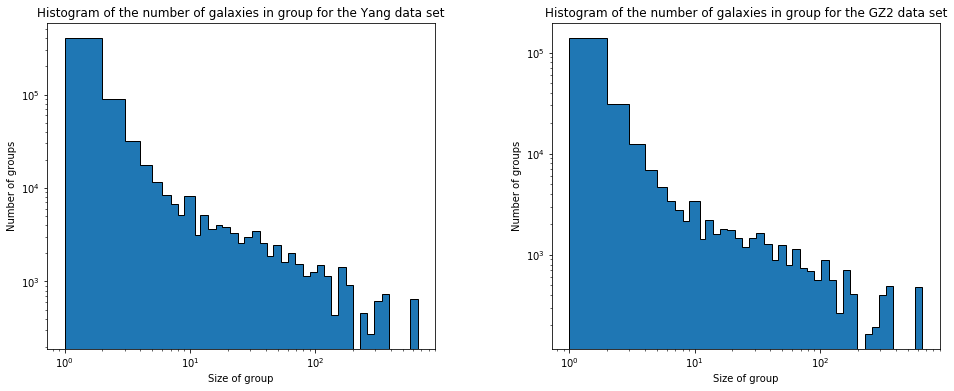

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Create logarithmically spaced bins for logarithmic histogram plot
bin_start = np.log10(min(group_data["group_size"]))
bin_end = np.log10(max(group_data["group_size"]))
num_of_bins = 50
log_bins = np.logspace(bin_start, bin_end, num_of_bins)
log_bins = np.around(log_bins)
log_bins = np.unique(log_bins)

# Plot histogram of group size for Yang data
ax[0].hist(group_data["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of groups")
ax[0].set_title("Histogram of the number of galaxies in group for the Yang data set")

# Plot histogram of group size for GZ2 data
ax[1].hist(gz2_data["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Number of groups")
ax[1].set_title("Histogram of the number of galaxies in group for the GZ2 data set")

fig.subplots_adjust(wspace=0.3)

plt.show()

Both sets of data follow the same trends and look similar, as expected. We can see that most groups are small in size, as there is a large peak near 1. To get an idea of the number of groups of each group size, we will count the number of unique groups at each size and create a table of this data.
<br>
We do this for both Yang and GZ2.

In [3]:
# Create pandas dataframes to allow us to use pandas' groupby function
group_data_pandas = group_data.to_pandas()
gz2_data_pandas = gz2_data.to_pandas()

# Group data by group size, then count then unique number of groups and count the number of unique groups
group_data_group_counts = group_data_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))
gz2_data_group_counts = gz2_data_pandas.groupby("group_size")["group id"].unique().apply(lambda x: len(x))

# Create a dataframe and size column, easier to work with
group_data_group_counts = pd.DataFrame(group_data_group_counts)
group_data_group_counts.columns = ["Number of Groups"]
group_data_group_counts["size"] = group_data_group_counts.index

# Create a dataframe and size column, easier to work with
gz2_data_group_counts = pd.DataFrame(gz2_data_group_counts)
gz2_data_group_counts.columns = ["Number of Groups"]
gz2_data_group_counts["size"] = gz2_data_group_counts.index

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
group_data_group_counts_df = pd.DataFrame()
group_data_group_counts_df.loc[0, "groups"] = sum(group_data_group_counts["Number of Groups"])
group_data_group_counts_df.loc[0, "groups N=1"] = group_data_group_counts[group_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=2"] = group_data_group_counts[group_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=3"] = group_data_group_counts[group_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=4"] = group_data_group_counts[group_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=5"] = group_data_group_counts[group_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N>5"] = sum(group_data_group_counts[group_data_group_counts["size"] > 5]["Number of Groups"])
group_data_group_counts_df = group_data_group_counts_df.astype(int)

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
gz2_data_group_counts_df = pd.DataFrame()
gz2_data_group_counts_df.loc[0, "groups"] = sum(gz2_data_group_counts["Number of Groups"])
gz2_data_group_counts_df.loc[0, "groups N=1"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=2"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=3"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=4"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=5"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N>5"] = sum(gz2_data_group_counts[gz2_data_group_counts["size"] > 5]["Number of Groups"])
gz2_data_group_counts_df = gz2_data_group_counts_df.astype(int)

# Create table of fraction of groups represented
group_representation = gz2_data_group_counts_df / group_data_group_counts_df

# Display tables
display(group_data_group_counts_df.style.set_caption("Yang group data:"))
display(gz2_data_group_counts_df.style.set_caption("GZ2 group data:"))
display(group_representation.style.set_caption("Fraction of Yang groups with at least 1 galaxy in GZ2:"))

,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,473872,405947,44441,10721,4388,2329,6046


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,184379,140520,24942,7812,3530,2004,5571


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,0.38909,0.346154,0.561238,0.728663,0.804467,0.860455,0.921436


As the plots suggested, most of the galaxies are in groups of only 1, with only very few groups of size > 5.

Around 39% of groups in Yang are also in the GZ2, but this is skewed heavily by the number of N=1 groups, of which 34.6% are in GZ2. As group size increases, the fraction of groups which are at least partially represented in GZ2 also increases, which we would expect (the more galaxies in a group the more likely it is at least 1 is also in GZ2). Most of the larger groups have at least 1 galaxy in GZ2.

### Missing galaxies and group completeness
As the number of galaxies in GZ2 is considerably smaller than the number in Yang, we expect that many groups will have missing galaxies; there will only be GZ2 data for a subset of the galaxies in the group.

We would like to know how complete the GZ2 data is for each group in GZ2, so we group the galaxies by their group id, and create a new column that gives the number of galaxies in each group that are also in the GZ2 data. The GZ2 data already contains a column giving the number of galaxies in the group from Yang, so we can compare the number of galaxies represented in GZ2 to the total number of galaxies in the group, allowing us to see how many galaxies we are missing.

Here we add columns to the GZ2 data giving the number of GZ2 galaxies in each group, the number of galaxies missing in each group, and the group completeness, which is the fraction of galaxies in each group also in GZ2.

In [4]:
# Create a pandas dataframe to allow us to use pandas' groupby function
gz2_data_pandas = gz2_data.to_pandas()

# Group galaxies by their group_id and create a new column with the number of galaxies in each group in the data set
gz2_data_pandas["GZ2_galaxies_in_group"] = gz2_data_pandas.groupby("group id")["group id"].transform("size")

# Create a new column with the number of galaxies missing from each group in the data set
gz2_data_pandas["galaxies_missing"] = gz2_data_pandas["group_size"] - gz2_data_pandas["GZ2_galaxies_in_group"]

# Create a new column with the fractional completeness of the group
gz2_data_pandas["group_completeness"] = gz2_data_pandas["GZ2_galaxies_in_group"] / gz2_data_pandas["group_size"]

# Turn the dataframe back into an astropy table and display the new columns
gz2_data = Table.from_pandas(gz2_data_pandas)
gz2_data[["group id", "group_size", "GZ2_galaxies_in_group", "galaxies_missing", "group_completeness"]][0:5]

group id,group_size,GZ2_galaxies_in_group,galaxies_missing,group_completeness
int32,int64,int64,int64,float64
3865,7,5,2,0.7142857142857143
4257,7,1,6,0.14285714285714285
62,88,63,25,0.7159090909090909
158,52,35,17,0.6730769230769231
1401,14,7,7,0.5


An example of the new columns we have created are shown above with the head of the data.

To see how the group completeness is spread, we create a scatter plot of group completeness against group size.

Average completeness of groups N>=5: 0.467
Average completeness of groups N>=10: 0.477
Average completeness of groups N>=30: 0.528


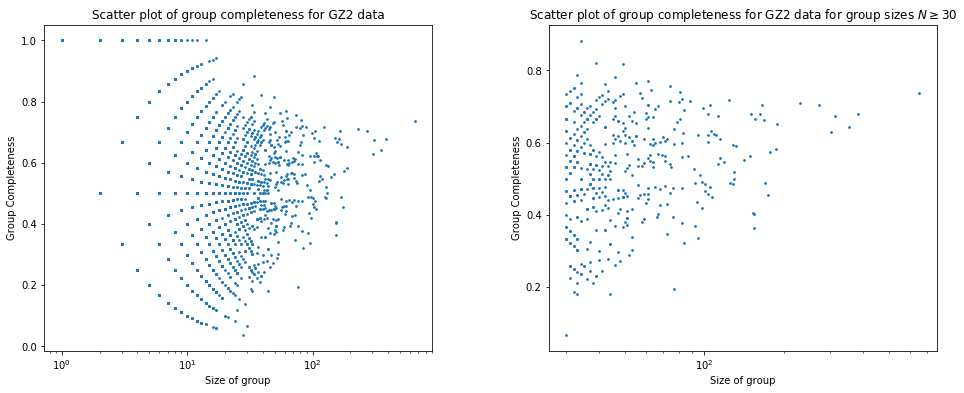

In [5]:
# Create a pandas dataframe and group data by size of groups,
# calculating the average completeness for groups greater than a cetain size
gz2_data_pandas = gz2_data.to_pandas()
groups_unique = gz2_data_pandas.drop_duplicates(subset=["group id"], keep="first")  # Only keep 1 row for each group
groups_5_completeness = groups_unique[groups_unique["group_size"] >= 5]["group_completeness"].mean()
groups_10_completeness = groups_unique[groups_unique["group_size"] >= 10]["group_completeness"].mean()
groups_30_completeness = groups_unique[groups_unique["group_size"] >= 30]["group_completeness"].mean()
print("Average completeness of groups N>=5: " + str(np.round(groups_5_completeness, decimals=3)))
print("Average completeness of groups N>=10: " + str(np.round(groups_10_completeness, decimals=3)))
print("Average completeness of groups N>=30: " + str(np.round(groups_30_completeness, decimals=3)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(groups_unique["group_size"], groups_unique["group_completeness"], s=3)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Group Completeness")
ax[0].set_title("Scatter plot of group completeness for GZ2 data")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
groups_unique_30 = groups_unique[groups_unique["group_size"] >= 30]
ax[1].scatter(groups_unique_30["group_size"], groups_unique_30["group_completeness"], s=3)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Group Completeness")
ax[1].set_title("Scatter plot of group completeness for GZ2 data for group sizes $N \geq 30$")

fig.subplots_adjust(wspace=0.3)

plt.show()

On average, groups with $N \geq 10$ have an average group completeness of 0.477, and groups with $N \geq 30$ have an average group completeness of 0.528. The is a very slight upward trend of group completeness with group size for larger groups suggested by this and the second plot.

This trend is likely due to small number statistics as we have a small number of larger group. As previously stated, we do not expect larger groups to contain brighter galaxies, so we should not expect galaxies from larger groups to be more likely to be included in GZ2 and give a greater group completeness.

### Megers and groups
Now we have seen how the group data is spread, we would like to know how mergers and group properties are related. We will use the threshold for merger classification we have done previously:
- "t06_odd_a14_yes_count" $\geq$ 20
- "t06_odd_a14_yes_debiased" > 0.42
- "t08_odd_feature_a24_merger_count" $\geq$ 10
- "t08_odd_feature_a24_merger_debiased" > 0.4

With galaxies passing this criteria classified as mergers, we will plot how they are spread with group size, as we have done previously for Yang and the entire GZ2 data. We also plot a scatter plot of group size against number of merger votes.

Number of mergers: 6979


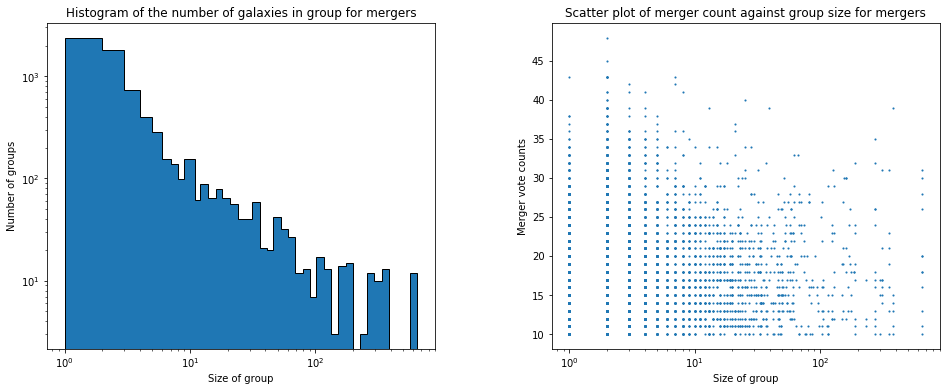

In [6]:
# Create a new column in the data, with a value of 1 if the galaxy is classified as a merger, and 0 if not
gz2_data_pandas = gz2_data.to_pandas()
gz2_data_pandas.loc[(gz2_data_pandas["t06_odd_a14_yes_count"] >= 20) & (gz2_data_pandas["t06_odd_a14_yes_debiased"] > 0.42) & (gz2_data_pandas["t08_odd_feature_a24_merger_count"] >= 10) & (gz2_data_pandas["t08_odd_feature_a24_merger_debiased"] > 0.4), "merger_yes"] = 1
gz2_data_pandas["merger_yes"].fillna(0, inplace=True)
gz2_data = Table.from_pandas(gz2_data_pandas)

# New table of only the galaxies classified as mergers
mergers = gz2_data[gz2_data["merger_yes"] == 1]
print("Number of mergers: "+ str(len(mergers)))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of group size for galaxies classified as mergers
ax[0].hist(mergers["group_size"], bins=log_bins, edgecolor="black", histtype="stepfilled")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of groups")
ax[0].set_title("Histogram of the number of galaxies in group for mergers")

# Plot scatter plot of number of merger votes against group size, for galaxies classified as mergers
ax[1].scatter(mergers["group_size"], mergers["t08_odd_feature_a24_merger_count"], s=1.2)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger vote counts")
ax[1].set_title("Scatter plot of merger count against group size for mergers")

fig.subplots_adjust(wspace=0.3)

plt.show()

We see roughly the same spread of group size for the merger data as we have done previously for Yang and GZ2. We do not expect the exact same spread as we have a prior belief that the fraction of mergers is correlated with group size in some way. We will later investigate the merger fraction (the fraction of galaxies that are merging) as a function of group size to see how group size affects the likelihood of a galaxy being a merger.

The number of counts for a merger seems to be randomly spread in group size.

### Merger threshold
As a quick aside, we will look at what galaxies are not classified as mergers as they do not pass the final criterion, "t08_odd_feature_a24_merger_debiased" > 0.4. We choose to look at these galaxies as this is the hardest threshold to pass (if 3 of the 4 thresholds are passed, this is the final threshold which cuts out the most galaxies).

First we will look at how many galaxies pass the first three thresholds but fail the final one.

In [7]:
# Create subset of data containing galaxies which pass the first three criteria and fail the final one
not_mergers = gz2_data[(gz2_data["t06_odd_a14_yes_count"] >= 20) & (gz2_data["t06_odd_a14_yes_debiased"] > 0.42) & (gz2_data["t08_odd_feature_a24_merger_count"] >= 10) & (gz2_data["t08_odd_feature_a24_merger_debiased"] <= 0.4)]
print("Number of galaxies classified as mergers: " + str(len(mergers)))
print("Number of galaxies failing the final criteria: " + str(len(not_mergers)))

Number of galaxies classified as mergers: 6979
Number of galaxies failing the final criteria: 1106


The number of galaxies failing only the final threshold is 1106, compared to the number of galaxies passing all 4 thresholds 6979.
<br>
As we are interested in mergers, and more votes for a merger increases the likelihood of the galaxy being a merger, we will look at a similar subset of GZ2, but with at least 15 and at least 20 votes for a merger, with the other thresholds remaining the same as before.

In [8]:
# Create subset of data containing galaxies which pass the first three criteria and fail the final one, with a higher threshold on merger votes
not_mergers_15 = gz2_data[(gz2_data["t06_odd_a14_yes_count"] >= 20) & (gz2_data["t06_odd_a14_yes_debiased"] > 0.42) & (gz2_data["t08_odd_feature_a24_merger_count"] >= 15) & (gz2_data["t08_odd_feature_a24_merger_debiased"] <= 0.4)]
not_mergers_20 = gz2_data[(gz2_data["t06_odd_a14_yes_count"] >= 20) & (gz2_data["t06_odd_a14_yes_debiased"] > 0.42) & (gz2_data["t08_odd_feature_a24_merger_count"] >= 20) & (gz2_data["t08_odd_feature_a24_merger_debiased"] <= 0.4)]
print("Number of galaxies failing the final criteria with at least 15 merger votes: " + str(len(not_mergers_15)))
print("Number of galaxies failing the final criteria with at least 20 merger votes: " + str(len(not_mergers_20)))

Number of galaxies failing the final criteria with at least 15 merger votes: 85
Number of galaxies failing the final criteria with at least 20 merger votes: 10


This higher threshold on the number of merger votes significantly reduces the amount of galaxies in this subset, with only 85 and 10 galaxies compared to 1106 previously.

20 votes for being a merger is considerable, as the average number of unique classifications for a galaxy in GZ2 is only 44. We might find it interesting to look at the 10 galaxies which have at least 20 merger votes, but still fail the debiased vote fraction $p_m > 0.4$ threshold.

In [9]:
# Rename some columns to make them easier to read and understand
not_mergers_20_pandas = not_mergers_20.to_pandas()
not_mergers_20_pandas.rename({"group_size":"group size", "total_classifications":"total classifications", "t08_odd_feature_a24_merger_count":"merger votes"}, axis=1, inplace=True)
not_mergers_20_pandas.rename({"t08_odd_feature_a24_merger_debiased":"merger debiased vote fraction", "t08_odd_feature_a24_merger_weighted_fraction":"merger weighted vote fraction"}, axis=1, inplace=True)
not_mergers_20_pandas.rename({"t06_odd_a14_yes_count":"odd votes", "t06_odd_a14_yes_debiased":"odd debiased vote fraction", "PETROMAG_R":"apparent r band magnitude"}, axis=1, inplace=True)

# Display columns of interest
display(not_mergers_20_pandas[["specobjid", "ra", "dec", "REDSHIFT", "group size", "total classifications", "odd votes", "odd debiased vote fraction", "merger votes", "merger weighted vote fraction", "merger debiased vote fraction", "apparent r band magnitude"]])

,specobjid,ra,dec,REDSHIFT,group size,total classifications,odd votes,odd debiased vote fraction,merger votes,merger weighted vote fraction,merger debiased vote fraction,apparent r band magnitude
0,851190818168399872,119.244972,34.092846,0.070727,1,57,50,0.927456,20,0.400,0.400000,16.349695
1,2048034271825782784,232.354950,5.325003,0.060066,3,49,40,0.894379,23,0.575,0.056136,16.750366
2,2515352815002478592,186.557877,30.975035,0.061889,71,43,37,0.933344,31,0.838,0.394118,16.708282
3,1995222504976705536,196.958740,14.698394,0.063472,3,51,39,0.881664,26,0.667,0.211189,16.788839
4,1048221378425153536,126.068703,30.483030,0.063675,3,39,33,0.942518,22,0.667,0.249503,16.856144
5,2987014997722294272,204.159775,20.542467,0.072702,2,43,36,0.988152,25,0.694,0.217813,16.884600
6,3140252839226402816,220.262253,21.320135,0.042122,1,48,43,0.927085,23,0.535,0.341984,16.973511
7,2584082735605770240,147.506638,22.675549,0.080821,2,53,43,0.976329,29,0.674,0.202661,16.979313
8,382943435650263040,198.351532,-1.833256,0.081643,2,44,31,0.887497,20,0.645,0.151680,16.999109
9,970692609594910720,126.877464,34.232563,0.087497,2,46,34,0.852282,20,0.588,0.356442,17.129517


Of the 10 galaxies here, 9 of them have a weighted merger vote fraction greater than 0.4 (a minimum of 0.535, maximum of 0.838). When debiased has been applied however, there is a significant change in the debiased merger vote fraction, enough to drop below 0.4 and fail the final threshold.

It is interesting as to why this happens. The galaxies are not at particularly high or low redshifts, and are not particularly dim, so why these galaxies are affected so much by debiasing is unknown.

We have obtained images of these 10 galaxies and shown them below.

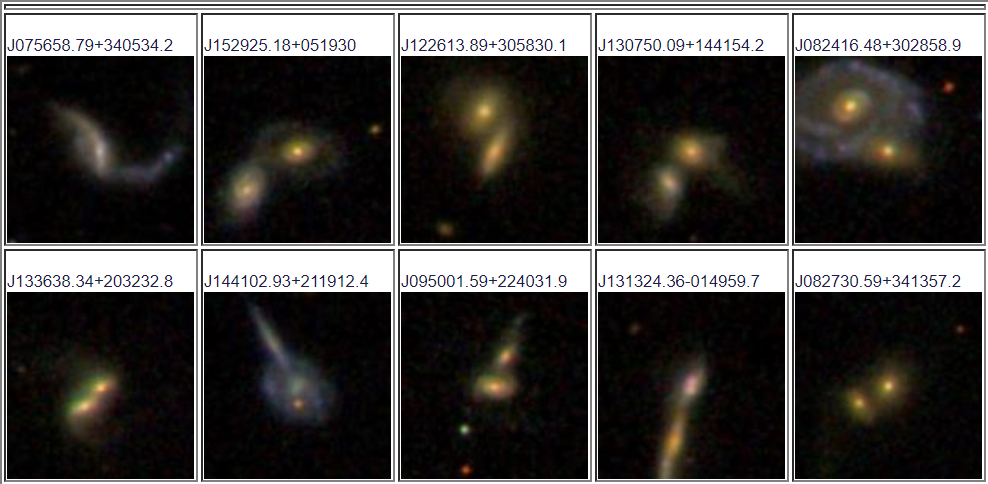

In [10]:
import urllib.request
from PIL import Image
url = "https://i.imgur.com/huD09JQ.png"
image = Image.open(urllib.request.urlopen(url))
image

These galaxies look like convincing mergers, so the strong debiasing effect is removing them from our merger sample.

In future this could be looked at further, to discover why the debiasing of the merger vote fraction is so strong for these galaxies and attempt to include them in the merger sample. For now we will ignore this and carry on using only the galaxies passing the initial thresholds, giving us 6979 mergers.

### The merger fraction and group size
Now we have an idea of what the group data and merger data looks like, we will investigate how the merger fraction $f_m$ (the fraction of galaxies that are undergoing mergers) changes with group size.

Our hypothesis is that at low group sizes the merger fraction will be small, as it is unlikely that, for example, in a group size of 2 that the galaxies are merging. We also expect that for large group sizes the merger fraction will be small, as the energy in larger groups is much higher, meaning the galaxies have greater velocities and therefore will be more likely to fly-by other galaxiess rather than become gravitationally bound and merge, unless it is a head on collision.

To calculate the merger fraction for a given group size, we will first count the number of galaxies of a certain group size, then count the number of these that are classified as mergers. The merger fraction will be the fraction of the total number of galaxies that are classified as mergers.

In [11]:
gz2_data_pandas = gz2_data.to_pandas()
group_sizes_unique = np.sort(gz2_data_pandas["group_size"].unique())

merger_fraction_group = np.zeros((len(group_sizes_unique), 2))
i=0
for x in group_sizes_unique:
    galaxies_of_group_size = gz2_data_pandas[gz2_data_pandas["group_size"] == x]
    merger_fraction_group[i, 0] = x
    merger_fraction_group[i, 1] = sum(galaxies_of_group_size["merger_yes"] == 1) / len(galaxies_of_group_size)
    i += 1

merger_fraction_group_big = merger_fraction_group[merger_fraction_group[:, 0] >= 10]

Now we have calculated the merger fraction for each group size, we create a scatter plot of merger fraction against group size. We create two plots, one with all group sizes, and one with only group sizes $N \geq 10$.

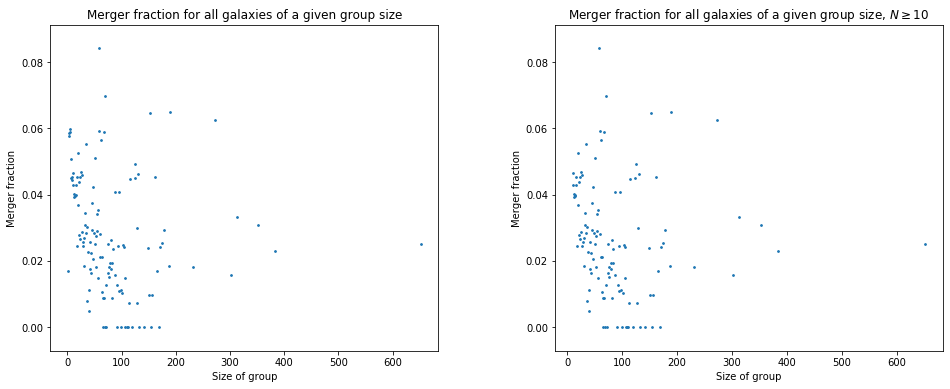

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(merger_fraction_group[:,0], merger_fraction_group[:,1], s=3)
# ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Merger fraction")
ax[0].set_title("Merger fraction for all galaxies of a given group size")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
ax[1].scatter(merger_fraction_group_big[:,0], merger_fraction_group_big[:,1], s=3)
# ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger fraction")
ax[1].set_title("Merger fraction for all galaxies of a given group size, $N \geq 10$")

fig.subplots_adjust(wspace=0.3)

plt.show()

We plot the same graphs again, but with a logarithmic scale on the x axis.

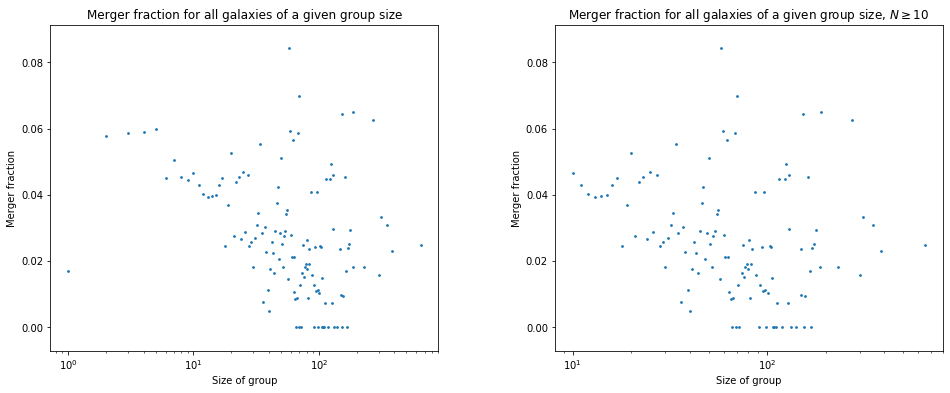

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot a scatter plot of group completeness for all groups in GZ2
ax[0].scatter(merger_fraction_group[:,0], merger_fraction_group[:,1], s=3)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Merger fraction")
ax[0].set_title("Merger fraction for all galaxies of a given group size")

# Plot a scatter plot of group completeness for groups in GZ2 which are larger than 30 galaxies 
ax[1].scatter(merger_fraction_group_big[:,0], merger_fraction_group_big[:,1], s=3)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Merger fraction")
ax[1].set_title("Merger fraction for all galaxies of a given group size, $N \geq 10$")

fig.subplots_adjust(wspace=0.3)

plt.show()

The scatter plots are not very informative, there are too many data points that widly vary due to the small sample size of a specific group size. Instead we should group the data into bins by group size, to increase the number of galaxies for each data point and attempt to reduce the wild variations.

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  11.  12.  14.  16.  18.
  21.  24.  27.  31.  36.  41.  46.  53.  60.  69.  79.  90. 102. 117.
 133. 152. 174. 198. 226. 258. 295. 337. 384. 438. 500. 571. 652.]
[ 10.  11.  12.  13.  14.  15.  17.  18.  20.  22.  23.  26.  28.  30.
  33.  36.  39.  43.  46.  51.  55.  60.  65.  71.  77.  84.  92. 100.
 109. 119. 129. 141. 153. 167. 181. 198. 215. 234. 255. 278. 303. 330.
 359. 391. 426. 464. 505. 550. 599. 652.]


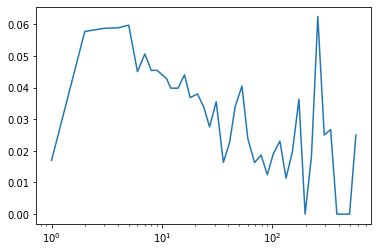

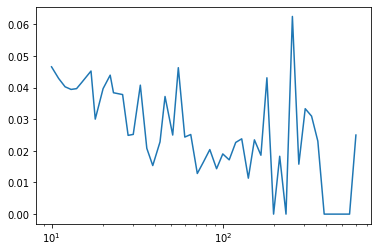

In [15]:
bin_start = np.log10(min(gz2_data["group_size"]))
bin_end = np.log10(max(gz2_data["group_size"]))
num_of_bins = 50
log_bins_50 = np.logspace(bin_start, bin_end, num_of_bins)
log_bins_50 = np.around(log_bins_50)
log_bins_50 = np.unique(log_bins_50)

log_bins_50_2 = np.logspace(np.log10(10), bin_end, num_of_bins)
log_bins_50_2 = np.around(log_bins_50_2)
log_bins_50_2 = np.unique(log_bins_50_2)
print(log_bins_50)
print(log_bins_50_2)


allbinned, mag_bin_edges = np.histogram(gz2_data["group_size"], bins=log_bins_50)
mergersbinned, mag_bin_edges = np.histogram(mergers["group_size"], bins=log_bins_50)
mag_bin_centres = log_bins_50[:-1]
allbinned = allbinned.astype(float)
mergersbinned = mergersbinned.astype(float)
mag_merger_fraction = np.divide(mergersbinned, allbinned, out=np.zeros_like(mergersbinned), where=allbinned!=0)

allbinned2, mag_bin_edges2 = np.histogram(gz2_data["group_size"], bins=log_bins_50_2)
mergersbinned2, mag_bin_edges2 = np.histogram(mergers["group_size"], bins=log_bins_50_2)
mag_bin_centres2 = log_bins_50_2[:-1]
allbinned2 = allbinned2.astype(float)
mergersbinned2 = mergersbinned2.astype(float)
mag_merger_fraction2 = np.divide(mergersbinned2, allbinned2, out=np.zeros_like(mergersbinned2), where=allbinned2!=0)

# # Define a function that given some data, will return the merger fraction against redshift
# def merger_fraction_binning(data, bins):
#     """Takes data, picks out mergers, returns an array of merger fraction against 
#     group size and the centres of each redshift bin for plotting"""
    
    
#     # Bin data by redshift, with the bin sizes specified from 0 to the maximum
#     allbinned, mag_bin_edges = np.histogram(mag_data["REDSHIFT"], bins=np.arange(0, max_z+z_steps, z_steps))
#     mergersbinned, mag_bin_edges = np.histogram(mag_data_mergers["REDSHIFT"], bins=np.arange(0, max_z+z_steps, z_steps))
    
#     # Calculate the centre of the bins for plotting data
#     mag_bin_centres = mag_bin_edges[:-1] + z_steps/2
    
#     allbinned = allbinned.astype(float)
#     mergersbinned = mergersbinned.astype(float)
    
#     # If there are no galaxies in redshift bin, make dividing by zero give zero to avoid error
#     mag_merger_fraction = np.divide(mergersbinned, allbinned, out=np.zeros_like(mergersbinned), where=allbinned!=0)
    
#     # mag_merger_fraction[mag_merger_fraction == 0 ] = np.nan
    
#     return mag_merger_fraction, mag_bin_centres


plt.plot(mag_bin_centres, mag_merger_fraction)
plt.xscale("log")
plt.show()

plt.plot(mag_bin_centres2, mag_merger_fraction2)
plt.xscale("log")
plt.show()

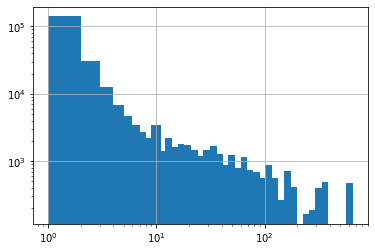

In [16]:
gz2_data_pandas["group_size"].hist(bins=log_bins)
plt.xscale("log")
plt.yscale("log")

In [ ]:
bins = pd.qcut(x=gz2_data["REDSHIFT"], q=5, labels=False, retbins=True)[1]
test1, test2, _ = plt.hist(gz2_data["REDSHIFT"], bins=bins)
print(test1, bins)